# Import Required Libraries

In [ ]:
pip install -U scikit-learn scipy matplotlib

In [13]:
import pandas as pd
import numpy as np
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
!pip install seaborn

In [ ]:
pip install pandas

# Load Data

In [14]:
reviews_df = pd.read_csv("user_reviews.csv")
apps_df = pd.read_csv("apps.csv")

# Data Preprocessing for Reviews

In [15]:

reviews_df.dropna(subset=['Translated_Review', 'Sentiment'], inplace=True)
reviews_df = reviews_df[['Translated_Review', 'Sentiment']]

# EDA

In [16]:

print("User Reviews Dataset Overview:")
print(reviews_df.info())

User Reviews Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
Index: 5280 entries, 0 to 8485
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Translated_Review  5280 non-null   object
 1   Sentiment          5280 non-null   object
dtypes: object(2)
memory usage: 123.8+ KB
None


In [17]:
print("\nSentiment Distribution:")
print(reviews_df['Sentiment'].value_counts())


Sentiment Distribution:
Sentiment
Positive    3338
Negative    1227
Neutral      714
Posi           1
Name: count, dtype: int64


In [18]:
# Basic EDA for apps.csv
print("\nApps Dataset Overview:")
print(apps_df.info())


Apps Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8353 entries, 0 to 8352
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      8353 non-null   int64  
 1   App             8353 non-null   object 
 2   Category        8353 non-null   object 
 3   Rating          7210 non-null   float64
 4   Reviews         8353 non-null   int64  
 5   Size            7218 non-null   object 
 6   Installs        8353 non-null   object 
 7   Type            8352 non-null   object 
 8   Price           8353 non-null   object 
 9   Content Rating  8353 non-null   object 
 10  Genres          8353 non-null   object 
 11  Last Updated    8353 non-null   object 
 12  Current Ver     8346 non-null   object 
 13  Android Ver     8351 non-null   object 
dtypes: float64(1), int64(2), object(11)
memory usage: 913.7+ KB
None


In [19]:
print("\nTop Categories by App Count:")
print(apps_df['Category'].value_counts().head())


Top Categories by App Count:
Category
FAMILY      1510
GAME         828
TOOLS        708
MEDICAL      376
BUSINESS     340
Name: count, dtype: int64


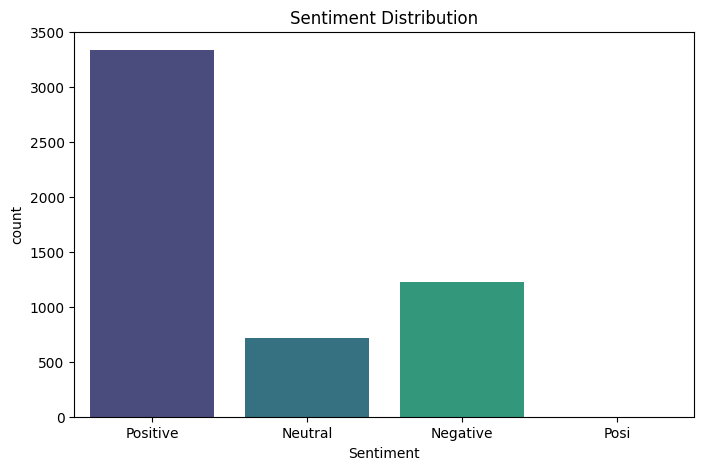

In [20]:
# Visualizations
# 1. Sentiment Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=reviews_df, x='Sentiment', palette='viridis')
plt.title('Sentiment Distribution')
plt.show()


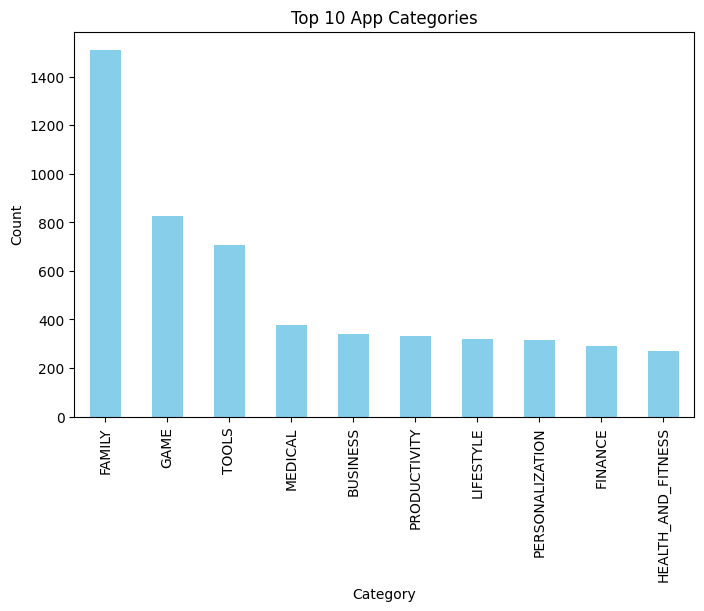

In [21]:
# 2. Top 10 App Categories
plt.figure(figsize=(8, 5))
apps_df['Category'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 App Categories')
plt.ylabel('Count')
plt.xlabel('Category')
plt.show()


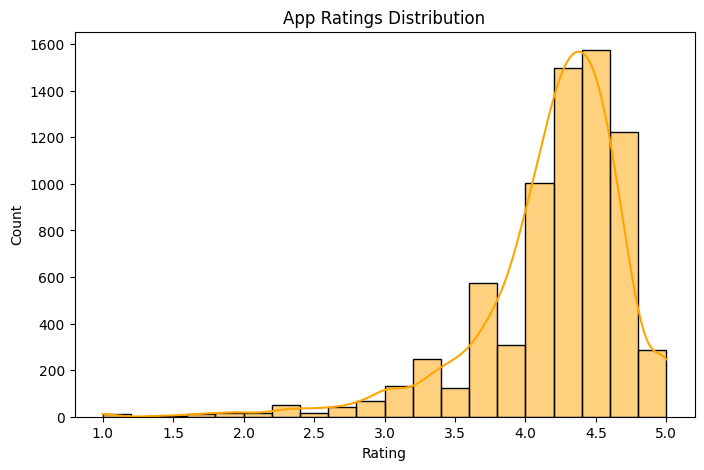

In [22]:
# 3. App Ratings Distribution
plt.figure(figsize=(8, 5))
sns.histplot(apps_df['Rating'], kde=True, bins=20, color='orange')
plt.title('App Ratings Distribution')
plt.xlabel('Rating')
plt.show()

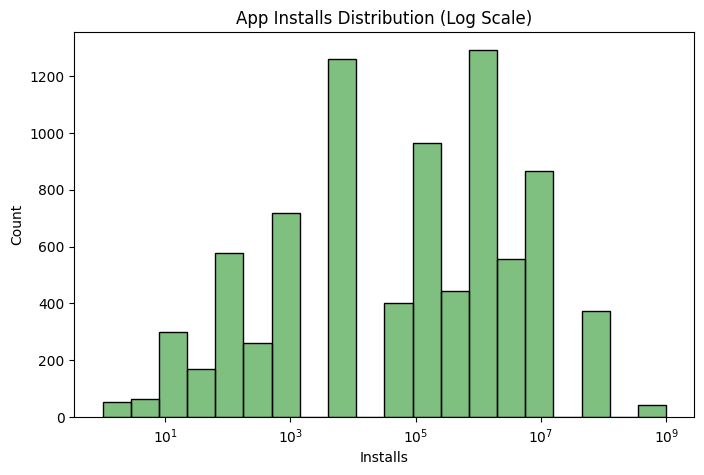

In [23]:
# 4. App Installs Distribution (log scale for better visualization)
plt.figure(figsize=(8, 5))
apps_df['Installs'] = apps_df['Installs'].str.replace('[+,]', '', regex=True).astype(int)
sns.histplot(apps_df['Installs'], kde=True, bins=20, color='green', log_scale=True)
plt.title('App Installs Distribution (Log Scale)')
plt.xlabel('Installs')
plt.show()

In [24]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

# Text Preprocessing

In [25]:
# Text Preprocessing Function
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalnum()]
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return " ".join(tokens)

# Data Preprocessing for Reviews
# Removing NaN values in the Sentiment column
reviews_df.dropna(subset=['Translated_Review', 'Sentiment'], inplace=True)

# Ensure the Sentiment column contains no NaN values
reviews_df = reviews_df[reviews_df['Sentiment'].notna()]

# Encode Sentiments (Mapping Positive to 1, Negative to 0, and filtering only these two classes)
reviews_df = reviews_df[reviews_df['Sentiment'].isin(['Positive', 'Negative'])]
reviews_df['Sentiment_Encoded'] = reviews_df['Sentiment'].map({'Positive': 1, 'Negative': 0})

# Process the reviews
reviews_df['Processed_Review'] = reviews_df['Translated_Review'].apply(preprocess_text)


# Train-Test Split

In [26]:
# Split Data
X = reviews_df['Processed_Review']
y = reviews_df['Sentiment_Encoded']

# Convert Text to Features using TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Random Forest Model

In [27]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [28]:
rf_y_pred = rf_classifier.predict(X_test)

print("Confusion Matrix:")
rf_cm = confusion_matrix(y_test, rf_y_pred)
print(rf_cm)

Confusion Matrix:
[[167  65]
 [ 14 667]]


In [29]:
print("\nClassification Report:")
print(classification_report(y_test, rf_y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, rf_y_pred))




Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.72      0.81       232
           1       0.91      0.98      0.94       681

    accuracy                           0.91       913
   macro avg       0.92      0.85      0.88       913
weighted avg       0.91      0.91      0.91       913


Accuracy Score: 0.9134720700985761


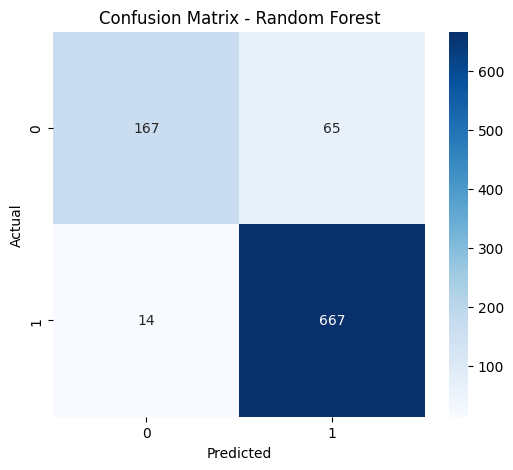

In [30]:
# Visualize Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(rf_cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

# Logistic Regression Classifier

In [31]:

lr_classifier = LogisticRegression(max_iter=200, random_state=42)
lr_classifier.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=42)

In [32]:
lr_y_pred = lr_classifier.predict(X_test)

print("Confusion Matrix:")
lr_cm = confusion_matrix(y_test, lr_y_pred)
print(lr_cm)

Confusion Matrix:
[[136  96]
 [ 11 670]]


In [33]:
print("\nClassification Report:")
print(classification_report(y_test, lr_y_pred))

print("\nAccuracy Score:", accuracy_score(y_test, lr_y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.59      0.72       232
           1       0.87      0.98      0.93       681

    accuracy                           0.88       913
   macro avg       0.90      0.79      0.82       913
weighted avg       0.89      0.88      0.87       913


Accuracy Score: 0.882803943044907


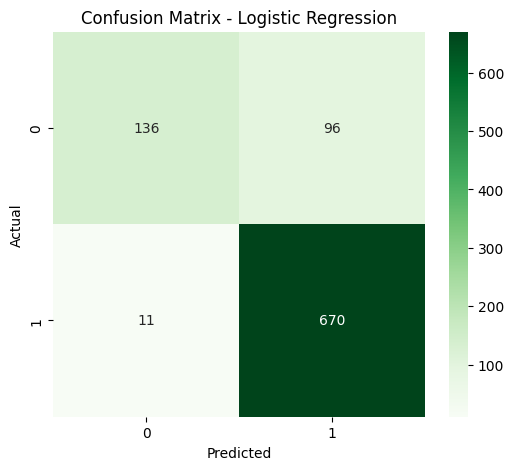

In [34]:
# Visualize Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(lr_cm, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - Logistic Regression")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

# Support Vector Classifier (SVC)

In [35]:

print("\nSupport Vector Classifier")
svc_classifier = SVC(kernel="linear", random_state=42)
svc_classifier.fit(X_train, y_train)


Support Vector Classifier


SVC(kernel='linear', random_state=42)

In [36]:
svc_y_pred = svc_classifier.predict(X_test)

print("Confusion Matrix:")
svc_cm = confusion_matrix(y_test, svc_y_pred)
print(svc_cm)


Confusion Matrix:
[[178  54]
 [ 23 658]]


In [37]:
print("\nClassification Report:")
print(classification_report(y_test, svc_y_pred))

print("\nAccuracy Score:", accuracy_score(y_test, svc_y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.77      0.82       232
           1       0.92      0.97      0.94       681

    accuracy                           0.92       913
   macro avg       0.90      0.87      0.88       913
weighted avg       0.91      0.92      0.91       913


Accuracy Score: 0.9156626506024096


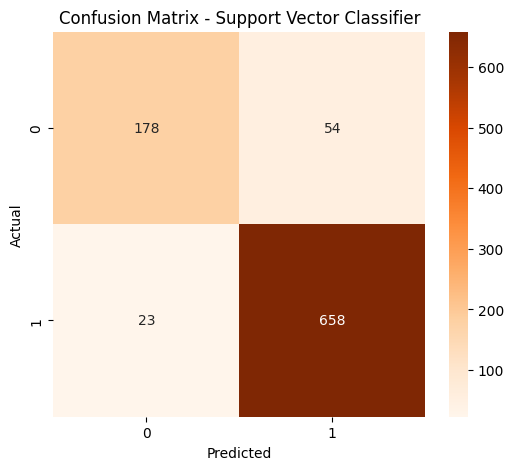

In [38]:
# Visualize Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(svc_cm, annot=True, fmt="d", cmap="Oranges")
plt.title("Confusion Matrix - Support Vector Classifier")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

# Summarization using Grouped Analysis

In [39]:

summary = reviews_df.groupby('Sentiment')['Translated_Review'].apply(lambda x: ' '.join(x))
print("\nSummarized Reviews:")
print(summary)


Summarized Reviews:
Sentiment
Negative    No recipe book Unable recipe book. Waste time ...
Positive    I like eat delicious food. That's I'm cooking ...
Name: Translated_Review, dtype: object


# Comparison of Model Accuracies

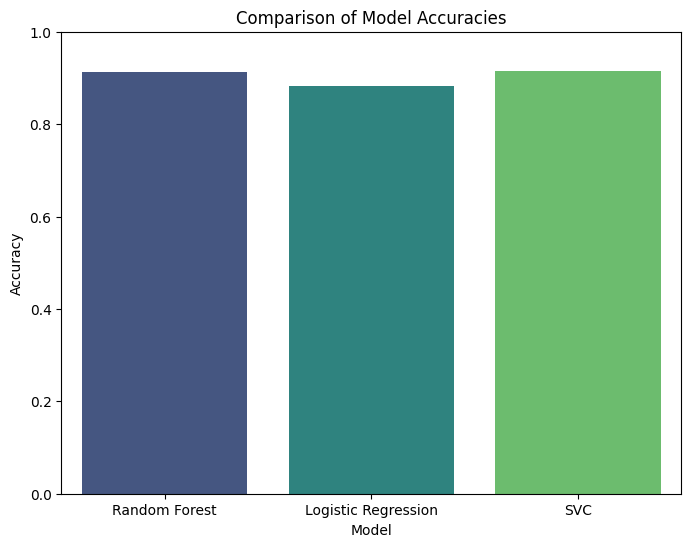

In [40]:
# Accuracy Scores of Models
rf_accuracy = accuracy_score(y_test, rf_y_pred)
lr_accuracy = accuracy_score(y_test, lr_y_pred)
svc_accuracy = accuracy_score(y_test, svc_y_pred)

# Bar Plot for Model Accuracies
model_names = ["Random Forest", "Logistic Regression", "SVC"]
accuracies = [rf_accuracy, lr_accuracy, svc_accuracy]

plt.figure(figsize=(8, 6))
sns.barplot(x=model_names, y=accuracies, palette="viridis")
plt.title("Comparison of Model Accuracies")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

# sentiment for user input text

In [41]:
# Function to predict sentiment for user input text
def predict_sentiment(input_text, model):
    # Preprocess the input text
    processed_text = preprocess_text(input_text)
    # Convert to TF-IDF features
    text_tfidf = tfidf.transform([processed_text])
    # Predict sentiment
    prediction = model.predict(text_tfidf)
    # Map prediction back to sentiment label
    sentiment_label = "Positive" if prediction[0] == 1 else "Negative"
    return sentiment_label

# User input section
while True:
    print("\nSentiment Prediction:")
    user_input = input("Enter a review (or type 'exit' to quit): ")
    if user_input.lower() == 'exit':
        print("Exiting Sentiment Prediction.")
        break

    # Display predictions for all three models
    rf_sentiment = predict_sentiment(user_input, rf_classifier)
    lr_sentiment = predict_sentiment(user_input, lr_classifier)
    svc_sentiment = predict_sentiment(user_input, svc_classifier)

    print(f"\nPredicted Sentiment:")
    print(f"Random Forest Classifier: {rf_sentiment}")
    print(f"Logistic Regression: {lr_sentiment}")
    print(f"Support Vector Classifier: {svc_sentiment}")



Sentiment Prediction:


Enter a review (or type 'exit' to quit):  i hate the food 



Predicted Sentiment:
Random Forest Classifier: Negative
Logistic Regression: Negative
Support Vector Classifier: Negative

Sentiment Prediction:


Enter a review (or type 'exit' to quit):  i product is damged 



Predicted Sentiment:
Random Forest Classifier: Positive
Logistic Regression: Positive
Support Vector Classifier: Positive

Sentiment Prediction:


Enter a review (or type 'exit' to quit):  I hate this product 



Predicted Sentiment:
Random Forest Classifier: Negative
Logistic Regression: Negative
Support Vector Classifier: Negative

Sentiment Prediction:


Enter a review (or type 'exit' to quit):  i like this product 



Predicted Sentiment:
Random Forest Classifier: Positive
Logistic Regression: Positive
Support Vector Classifier: Positive

Sentiment Prediction:


Enter a review (or type 'exit' to quit):  exit


Exiting Sentiment Prediction.
